# Linear Regression using Gradient Descent

Find a linear relation (predictor) which maps the input into output.

Mathematically,\
Given, 
$$X = [x^{(1)} x^{(2)} \ldots x^{(m)}]$$
$$y = [y^{(1)} y^{(2)} \ldots y^{(m)}]$$
and a linear model,
$$\hat{y} = f(X) = \theta^{T}X + b$$
Find parmaters $\theta$ and $b$ such the error between estimated output,$\hat{y}$ and given output,$y$ is minimized.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from IPython.display import HTML

### Linear Regression Cost Function 

$$\hat{y}^{(j)} = \theta_1 x^{(j)}_1 + \theta_2 x^{(j)}_2 + \ldots + \theta_n x^{(j)}_n + b$$
$$J(\theta, b) = \frac{1}{2m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)^2$$

#### Vectorization
$$
\begin{align}
\begin{bmatrix} 
\hat{y}^{(1)} & \hat{y}^{(2)} & \ldots  & \hat{y}^{(m)}
\end{bmatrix}
&=
\begin{bmatrix} 
\theta_1 & \theta_2 & \ldots  & \theta_n
\end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \ldots & x_2^{(m)} \\
\vdots & \vdots & \ldots & \vdots \\
x_n^{(1)} & x_n^{(2)} & \ldots & x_n^{(m)} \\
\end{bmatrix}
+ 
\underbrace{\begin{bmatrix} 
b & b & \ldots & b
\end{bmatrix}}_{\text{m times}}
\\
\hat{y} &= \theta^{T}X + b
\end{align}
$$

In [2]:
def computeCost(X, y, theta, b):
    '''
    Computes cost and estimated output for linear regression.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector
            theta (numpy array): n x 1 parameter column vector
            b (double)         : Bias parameter
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    y_hat = np.dot(theta.T, X) + b
    J = 1/(2*m)*np.sum((y_hat - y)**2)
    return (J, y_hat)

### Gradient Descent for Linear Regression

$$\theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} \\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)x_i^{(j)}
\end{align}$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$
$$\begin{align}
\frac{\partial J}{\partial b} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)\frac{\partial \hat{y}^{(j)}}{\partial b} \\
\frac{\partial J}{\partial b} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)
\end{align}$$

#### Vectorization of Gradient Descent for Linear Regression
$$
\begin{align}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_1} \\ \frac{\partial J}{\partial \theta_2} \\ \vdots  \\ \frac{\partial J}{\partial \theta_n}
\end{bmatrix}
&=
\frac{1}{m}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \ldots & x_2^{(m)} \\
\vdots & \vdots & \ldots & \vdots \\
x_n^{(1)} & x_n^{(2)} & \ldots & x_n^{(m)} \\
\end{bmatrix}
\begin{bmatrix} 
\hat{y}^{(1)} - y^{(1)} \\ \hat{y}^{(2)} - y^{(2)} \\ \vdots  \\ \hat{y}^{(m)} - y^{(m)}
\end{bmatrix}
\\
D\theta &= \frac{1}{m} X(\hat{y}-y)^T
\end{align}
$$

$$\theta := \theta - \alpha D\theta$$

In [3]:
def gradientDescent(X, y, theta, b, alpha, n_iterations, verbose=False):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector
            theta (numpy array): n x 1 parameter column vector
            b (double)         : Bias parameter
            alpha (double)     : Learning rate (Hyperparameter)
            n_iterations       : No. of iterations (Hyperparamter)
            verbose (boolean)  : Whether to print cost at every 100 iterations
        Returns:
            theta (numpy array)    : Modified n x 1 parameter column vector
            b (double)             : Modified bias parameter
            J_iterations (list)    : Cost over n_iterations 
            theta_iterations (list): Variation of parameter theta over n_iterations 
            b_iterations (list)    : Variation of parameter b over n_iterations 
    """
    J_iterations = []
    theta_iterations = []
    b_iterations = []

    for k in range(n_iterations):
        # Compute cost and estimated value
        J, y_hat = computeCost(X, y, theta, b)
        J_iterations.append(J)
        theta_iterations.append(theta.squeeze())
        b_iterations.append(b)
        
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        db = 1/m * np.sum(y_hat-y)
        
        # Update parameters
        theta = theta - alpha*D_theta
        b = b - alpha*db      
        
        if verbose == True:
            # Print cost every 100 iteration
            if k % 100 == 0:
                print("Iteration #"+str(k+1), "| Cost:", J)
    print("Iteration #"+str(k+1), "| Cost:", J)
    
    return (theta, b, J_iterations, theta_iterations, b_iterations)

## One Dimensional Linear Regresssion

In [4]:
def plotData(x, y):
    '''
    Plots population of city v/s profit. 
    
        Parameters:
            x (list or numpy array): Population in 10,000s
            y (list or numpy array): Profit in $10,000s
        Returns:
            None
    '''
    plt.plot(x, y, 'rx', markersize=10)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

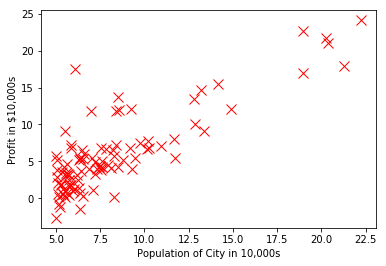

In [5]:
# Load and preprocess data
data = np.genfromtxt('data_regression_1d.csv', delimiter=',')
m, n = data.shape
n = n-1
X = (data[:,0].T).reshape((n,m))
y = data[:,1].reshape((1,m))

plotData(X,y)

In [6]:
# Initialize parameters
theta = np.zeros((n,1))
b = 0.

# Set hyperparameters
alpha = 0.01
n_iterations = 1500

# Run gradient descent
theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations, verbose=True)

Iteration #1 | Cost: 32.072733877455676
Iteration #101 | Cost: 5.479975580535112
Iteration #201 | Cost: 5.176152962891966
Iteration #301 | Cost: 4.964362046184744
Iteration #401 | Cost: 4.816725268028978
Iteration #501 | Cost: 4.713809531116866
Iteration #601 | Cost: 4.6420682682928565
Iteration #701 | Cost: 4.592058338363686
Iteration #801 | Cost: 4.557197046645755
Iteration #901 | Cost: 4.532895679657961
Iteration #1001 | Cost: 4.515955503078913
Iteration #1101 | Cost: 4.504146719537086
Iteration #1201 | Cost: 4.495914965394089
Iteration #1301 | Cost: 4.490176713352229
Iteration #1401 | Cost: 4.48617665019146
Iteration #1500 | Cost: 4.483411453374869


Text(0.5,0,'Iteration')

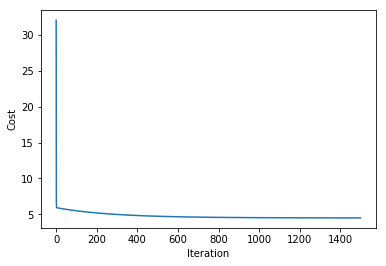

In [7]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

theta: 1.166362350335582 
b: -3.6302914394043597


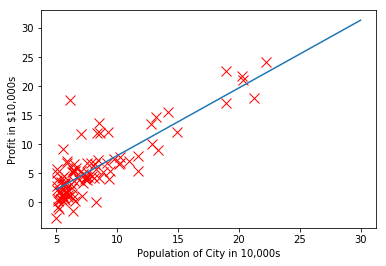

In [8]:
print("theta:", theta.squeeze(), "\nb:", b)

X_pred = np.array([5, 30]).reshape(1,2)
y_pred = np.dot(theta.T, X_pred) + b

plt.figure()
plotData(X,y)
plt.plot(X_pred.T, y_pred.T)

### Animate Parameters $\theta$ and $b$

In [9]:
X_pred = np.linspace(5, 30, 100).reshape(1,100)
def animate(i):
    slope = theta_iterations[i]
    c = b_iterations[i]
    y_pred = np.dot(slope.T, X_pred) + c
    line.set_data(X_pred, y_pred)
    return (line,)

Wall time: 1min 58s


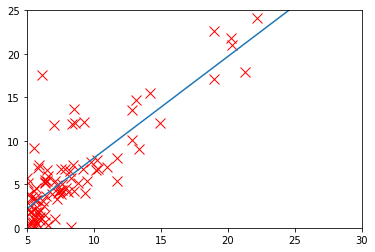

In [10]:
%%time

fig, ax = plt.subplots()

ax.set_xlim((5, 30))
ax.set_ylim((0, 25))

ax.plot(X, y, 'rx', markersize=10)
line, = ax.plot([], [])

anim = animation.FuncAnimation(fig, animate, frames=1499, interval=20, blit=True)
HTML(anim.to_html5_video()) # Takes long time to render

## Effect of Learning Rate, $\alpha$

### Variation of Cost Function, $J$

Learning rate = 0.002
Iteration #10 | Cost: 6.937171993786945
Learning rate = 0.004
Iteration #10 | Cost: 5.91720528181692
Learning rate = 0.006
Iteration #10 | Cost: 5.888192448683068
Learning rate = 0.008
Iteration #10 | Cost: 5.878927025770071
Learning rate = 0.01
Iteration #10 | Cost: 5.869843911806385
Learning rate = 0.02
Iteration #10 | Cost: 5.834878785201404
Learning rate = 0.022
Iteration #10 | Cost: 6.391805442825506
Learning rate = 0.024
Iteration #10 | Cost: 21.898572061030276
Learning rate = 0.025
Iteration #10 | Cost: 75.06892835059197


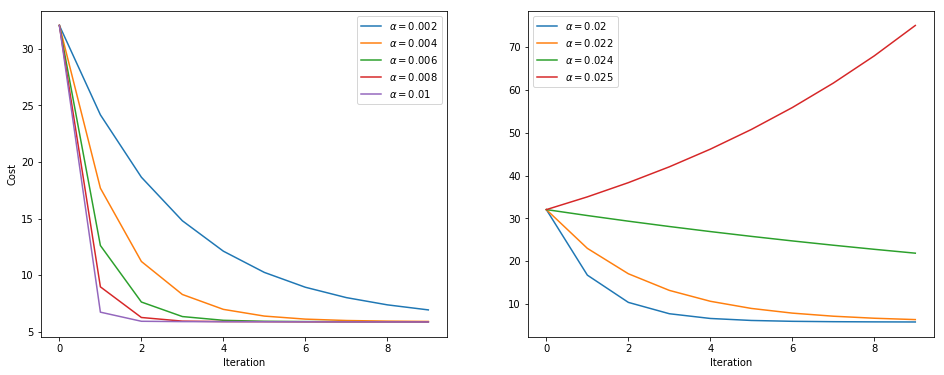

In [11]:
# Set hyperparameters
n_iterations = 10

plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

alphas_d = [0.002, 0.004, 0.006, 0.008, 0.010]
for alpha in alphas_d:
    print("Learning rate =", alpha)
    
    # Initialize parameters
    theta = np.zeros((n,1))
    b = 0.
    
    # Run gradient descent
    theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations)

    ax1.plot(J_iterations, label=r'$\alpha = $'+str(alpha))
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.legend()

alphas_i = [0.020, 0.022, 0.024, 0.025]
for alpha in alphas_i:
    print("Learning rate =", alpha)
    
    # Initialize parameters
    theta = np.zeros((n,1))
    b = 0.
    
    # Run gradient descent
    theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations)

    ax2.plot(J_iterations, label=r'$\alpha = $'+str(alpha))
ax2.set_xlabel("Iteration")
ax2.legend()

### Variation of parameters, $\theta$ and $b$

Learning rate = 0.015
Iteration #10 | Cost: 5.847378937936586
Learning rate = 0.02
Iteration #10 | Cost: 5.834878785201404
Learning rate = 0.025
Iteration #10 | Cost: 75.06892835059197


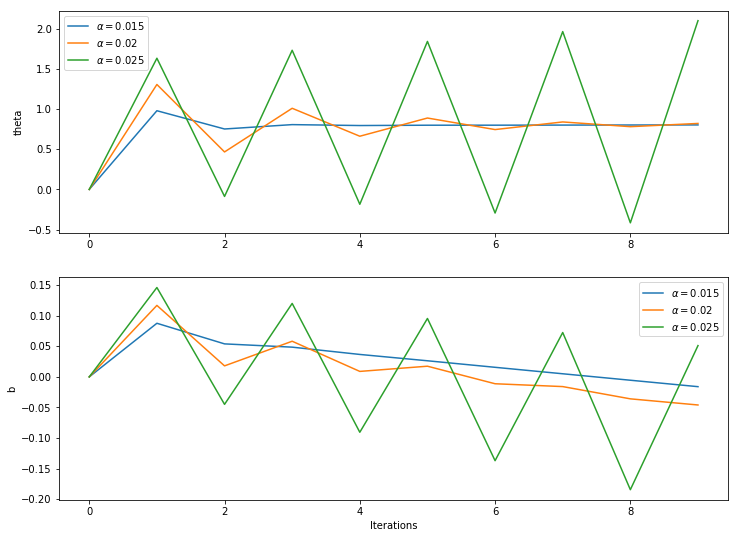

In [12]:
# Set hyperparameters
alphas = [0.015, 0.02, 0.025]
n_iterations = 10

plt.figure(figsize=(12, 9))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

for alpha in alphas:
    print("Learning rate =", alpha)
    
    # Initialize parameters
    theta = np.zeros((n,1))
    b = 0.
    
    # Run gradient descent
    theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations)

    ax1.plot(theta_iterations, label=r'$\alpha = $'+str(alpha))
    ax2.plot(b_iterations, label=r'$\alpha = $'+str(alpha))

ax1.set_ylabel("theta")
ax2.set_ylabel("b")
ax2.set_xlabel("Iterations")
ax1.legend()
ax2.legend()

## Multi Dimensional Linear Regression

### Feature Normalization
$$x_{n} = \frac{x-\mu}{\sigma}$$

In [13]:
def normalizeFeatures(X):
    """Nomalizes the feature vectors to have zero mean and unit variance
    
        Parameters:
            X (numpy array)     : n x m feature matrix (n feature vectors)
        Returns:
            X_norm (numpy array): n x m normalized feature matrix (n normalized feature vectors)
            mu (numpy array)    : n x 1 array of means of n features
            sigma (numpy array) : n x 1 array of standard deviations of n features
    """
    mu = np.mean(X, axis=1).reshape(-1,1)
    sigma = np.std(X, axis=1).reshape(-1,1)
    X_norm = (X-mu)/sigma
    return (X_norm, mu, sigma)

In [14]:
# Load and preprocess data
data = np.genfromtxt('data_regression_2d.csv', delimiter=',')
m, n = data.shape
n = n-1
X = (data[:,0:2].T).reshape((n,m))
y = data[:,2].reshape((1,m))
X, mu, sigma = normalizeFeatures(X)

In [15]:
# Initialize parameters
theta = np.zeros((n,1))
b = 0.

# Set hyperparameters
alpha = 0.01
n_iterations = 2500

# Run gradient descent
theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations, verbose=True)

Iteration #1 | Cost: 65591548106.45744
Iteration #101 | Cost: 10596969344.166977
Iteration #201 | Cost: 3344770635.4916563
Iteration #301 | Cost: 2288004374.3518343
Iteration #401 | Cost: 2105448288.6292474
Iteration #501 | Cost: 2063782403.6748848
Iteration #601 | Cost: 2051066484.7770286
Iteration #701 | Cost: 2046409416.161606
Iteration #801 | Cost: 2044562883.369333
Iteration #901 | Cost: 2043809396.2900314
Iteration #1001 | Cost: 2043498948.143308
Iteration #1101 | Cost: 2043370633.2335846
Iteration #1201 | Cost: 2043317543.3261771
Iteration #1301 | Cost: 2043295570.2118556
Iteration #1401 | Cost: 2043286474.888376
Iteration #1501 | Cost: 2043282709.9327545
Iteration #1601 | Cost: 2043281151.4339044
Iteration #1701 | Cost: 2043280506.2928202
Iteration #1801 | Cost: 2043280239.2361503
Iteration #1901 | Cost: 2043280128.687784
Iteration #2001 | Cost: 2043280082.9261765
Iteration #2101 | Cost: 2043280063.983112
Iteration #2201 | Cost: 2043280056.1416104
Iteration #2301 | Cost: 204328

Text(0.5,0,'Iteration')

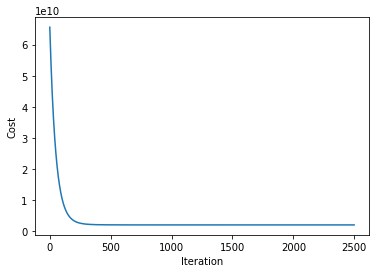

In [16]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

In [17]:
print("Parameters: ", theta.squeeze(), b)

Parameters:  [109446.85156478  -6577.4099493 ] 340412.6595702993


In [18]:
def predictCost(Xin, theta, b):
    """
    Predict price(s) of house given area(s) in sq-ft and number of bedrooms
        
        Parameters:
            Xin (numpy array)  : 2 x m feature matrix
            theta (numpy array): 2 x 1 parameter vector
            b (float)          : Bias parameter
        Returns:
            y_pred             : 1 x m predicted price vector
    """
    y_pred = np.dot(theta.T, Xin) + b
    return y_pred

In [19]:
area = 1380
n_rooms = 4
Xin = np.array([[area], [n_rooms]]);
Xin = (Xin-mu)/sigma
print("Normalized feature matrix: ", Xin.squeeze())
price = predictCost(Xin, theta, b)
print("Predicted price: ${:,}".format(int(price.squeeze())))

Normalized feature matrix:  [-0.78946678  1.10220517]
Predicted price: $246,758


# Normal Equation

Given, 
$$X = \begin{bmatrix} - x^{(1)T} - \\ - x^{(2)T} - \\ \vdots \\ - x^{(m)T} - \end{bmatrix}$$
$$y = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix}$$
and a linear model,
$$\hat{y} = f(X) = X\theta$$
where, $$\theta = \begin{bmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix}$$
Find $\theta$ such that $\| \hat{y}^{(i)}$ - $y^{(i)} \|$ is minimized.
$$
\begin{align}
\sum_{i=1}^{m} \left\| \hat{y}^{(i)}-y^{(i)} \right\|^2 &= \sum_{i=1}^{m} \left\| \theta^T x^{(i)}-y^{(i)} \right\|^2 \\
    &= (X\theta - y)^T(X\theta - y)
\end{align}
$$

$$
\begin{align}
\nabla_\theta (X\theta - y)^T(X\theta - y) &= 0 \\
\nabla_\theta (\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta + y^Ty) &= 0 \\
\nabla_\theta (\theta^TX^TX\theta - 2\theta^TX^Ty + y^Ty) &= 0 \\
\nabla_\theta (\theta^TX^TX\theta) - \nabla_\theta (2\theta^TX^Ty) &= 0 \\
2X^TX\theta - 2X^Ty &= 0 \\
X^TX\theta &= X^Ty
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
data = np.genfromtxt('data_regression_1d.csv', delimiter=',')
m, n = data.shape
X = np.append(np.ones((m, 1)), data[:,0].reshape(m,1), axis=1)
y = data[:,1].reshape(m, 1)

In [3]:
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(theta)

X_pred = np.array([5, 30]).reshape(2,1)
X_pred = np.append(np.ones((2, 1)), X_pred, axis=1)
y_pred = X_pred @ theta

[[-3.89578088]
 [ 1.19303364]]


Text(0.5,0,'Population of City in 10,000s')

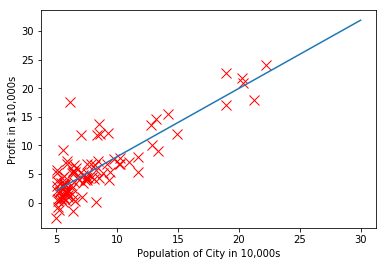

In [5]:
plt.figure()
plt.plot(X[:,1], y, 'rx', markersize=10)
plt.plot(X_pred[:,1], y_pred)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

---
###### TODO
    Cost Function Visualization